## Building an ARIMA model for timeseries forcasting


In [47]:
import pandas as pd 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np


df= pd.read_csv('../data/cleaned/toyota_stock.csv')

In [48]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
ts = df['Close']


### Train-Test

In [50]:
train = ts[:-30]
test = ts[-30:]

In [51]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(train, order=(5,1,0))
# here we used the common start order (5,1,0)
model_fit = model.fit()
print(model_fit.summary())

/home/houssem/Desktop/houcem/Projects For Data Science/Financials-Forcasting-Project/venv/lib64/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/houssem/Desktop/houcem/Projects For Data Science/Financials-Forcasting-Project/venv/lib64/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/houssem/Desktop/houcem/Projects For Data Science/Financials-Forcasting-Project/venv/lib64/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                11059
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18873.371
Date:                Wed, 27 Aug 2025   AIC                          37758.741
Time:                        13:09:05   BIC                          37802.607
Sample:                             0   HQIC                         37773.515
                              - 11059                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0162      0.005     -3.232      0.001      -0.026      -0.006
ar.L2         -0.0035      0.005     -0.667      0.505      -0.014       0.007
ar.L3          0.0120      0.006      2.165      0.0

## Now we forcast the future values

/home/houssem/Desktop/houcem/Projects For Data Science/Financials-Forcasting-Project/venv/lib64/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/houssem/Desktop/houcem/Projects For Data Science/Financials-Forcasting-Project/venv/lib64/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


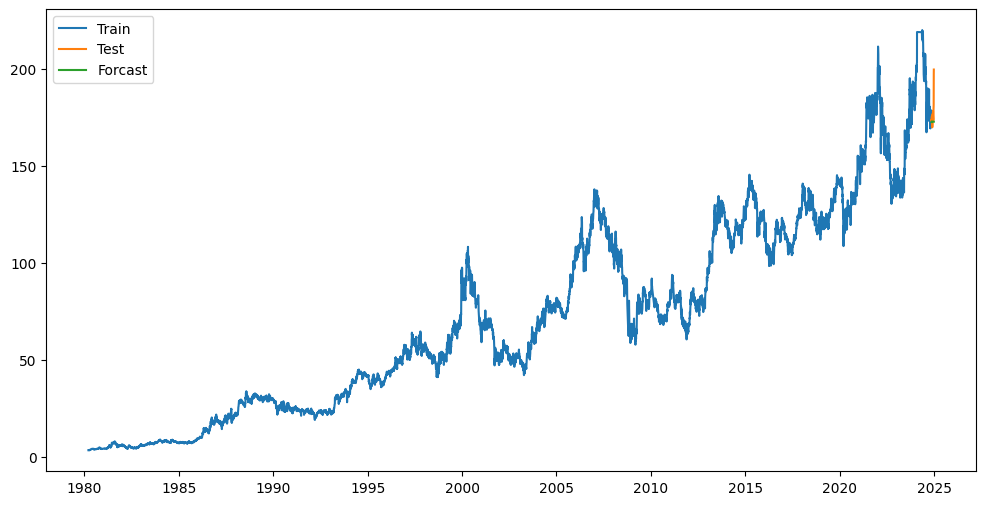

In [52]:
forcast = model_fit.forecast(steps=30)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train.index,train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(test.index,forcast ,label='Forcast')
plt.legend()
plt.show()

## Now we Evaluate the model by checking its accuracy with RMSE , MAE

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mae = mean_absolute_error(test, forcast)
rmse = np.sqrt(mean_squared_error(test, forcast))
print(f'MAE: {mae}, RMSE: {rmse}') 

MAE: 4.331644495659331, RMSE: 7.475400582275027


In [54]:
import pickle
# Save ARIMA model
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)